

# Final Project
Welcome to your final project! It's been my goal all semester to make the material in this class feel relevant to your future careers. To keep that going, this final project might look a little different from what you're used to. It looks more like the kind of work you could do in the corporate world rather than academic research.

# Prompt
You work as an analyst in the sales operations department in a SaaS (software as a service) company. Your boss is buildling out a new reporting structure that will allow company leaders to assess individual sales reps based on different variables.

\\
This is a fairly common task, but your boss has been through it enough times to have learned a few things. The main problem with a report like this is that analysts tend to include too many variables. As such, version 1 of the report can include only three variables.

\\
You should statistically determine which variables to include. The three you choose should have a moderately strong relationship with the variable of interest--in this case the percent of quota that a sales rep ends up selling, which is stored in the `Attainment` variable. All of the potential variables you could include are numeric, so you'll use the same statistical approach for each potential metric.

# Data
The dataset includes three months worth of data for around 500 sales reps. The reps were measured on the following variables.

*   `Attainment`: Your initial output variable. The percent of each sales rep's quota that they ended up selling
*   `Calls`: The number of prospecting calls each sales rep made
*   `Emails`: The number of prospecting emails each sales rep sent
*   `Engagement`: How engaged (happy at work) the sales rep was as measured by a survey early in the quarter
*   `HasDegree`: Whether the rep has a college degree. Includes percentages for partially completed degrees
*   `HoursWorked`: The number of hours worked by the rep in the quarter
*   `Live`: Percentage of meetings that were live compared to over the phone
*   `Meetings`: The number of meetings each rep had with potential clients
*   `Pipeline`: The dollar amount of all potential deals initiated by the rep
*   `Prizes`: The amount of prize money the rep won in various company competitions
*   `Questions`: The average number of questions clients asked the rep during meetings
*   `Ratio`: The ratio of time spent talking by the rep vs. the client during meetings
*   `Sentiment`: The quantified sentiment (positivity or negativity) of the language used during meetings
*   `TeamSize`: How many other sales reps were on the rep's team
*   `TrainSales`: The amount of time spent by the rep on sales training
*   `TrainProd`: The amount of time spent by the rep on product training

\\
# Instructions
This project has two main objectives: (1) finding the right variables to include in the report, and (2) convincing the project stakeholders that these variables deserve their attention.

\\
## Step 0 - A Note on Visualizations
To demonstrate your skill with data visualization, each plot you create should include the following
1.   Descriptive titles and axis labels (not the defaults)
2.   A color you select (not the default color)
3.   Summary statistics included somewhere on the plot (the average for a univariate plot, the correlation coefficient for a bivariate plot)

\\
## Step 1 - Data cleaning
You'll notice some missing data in several of the potential input columns. Clean these missing values using the following logic:
*   If >= 5 values are missing from a column, use median imputation
*   If < 5 values are missing from a column, remove those observations

\\
## Step 2 - Basic EDA of all variables
Any bivariate analysis should start with a univariate analysis of the two variables of interest. Since you'll be analyzing the relationship of every input variable with the output, you should perform some basic EDA on every variable.

\\
For your input variables, this will consist of a numeric summary (min, max, median, mean, standard deviation, and whether it is normally distributed). Include this summary for each variable in a dataframe (which you'll eventually export to its own `.csv` file) using this structure:




In [ ]:
import pandas as pd
summary = pd.DataFrame(columns = [
  'VariableName', 'Min', 'Max', 'Median', 'Mean', 'StdDeviation', 'IsNormal'
])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
sales_df = pd.read_csv('/content/drive/MyDrive/IS_115/Final2020/SalesData-Kyler_Ashby.csv')

In [ ]:
def clean_data(df):
  for column in df:
    if df[column].isnull().sum() >= 5:
      df[column].fillna(df[column].median(), inplace=True)
    elif df[column].isnull().sum() < 5:
      df.dropna(how='any', subset=[column], inplace=True)
  df.to_csv('clean_sales_data.csv')
clean_data(sales_df)

In [ ]:
def basic_eda(df):
  variable_name_list = []
  min_value_list = []
  max_value_list = []
  median_value_list = []
  mean_value_list = []
  std_dev_list = []
  skew_list = []
  kurt_list = []
  is_normal_list = []
  for column in df:
    variable_name = column
    variable_name_list.append(variable_name)

    min_value = df[column].min()
    min_value_list.append(min_value)

    max_value = df[column].max()
    max_value_list.append(max_value)

    median_value = df[column].median()
    median_value_list.append(median_value)

    mean_value = df[column].mean()
    mean_value_list.append(mean_value)

    std_dev = df[column].std()
    std_dev_list.append(std_dev)

    skew_value = df[column].skew()
    skew_list.append(skew_value)
    kurt_value = df[column].kurtosis()
    kurt_list.append(kurt_value)
    if skew_value > -1 and skew_value < 1 and kurt_value > -1 and kurt_value < 1:
      is_normal_list.append(1)
    else:
      is_normal_list.append(0)
    
  data_tuples = list(zip(variable_name_list,min_value_list,max_value_list,median_value_list,mean_value_list,std_dev_list,skew_list,kurt_list,is_normal_list))

  summary = pd.DataFrame(data_tuples, columns = [
      'VariableName', 'Min', 'Max', 'Median', 'Mean', 'StdDeviation', 'Skew', 'Kurtosis', 'IsNormal'
  ])
    
  return summary

summary_df = basic_eda(sales_df)
display(summary_df)



,VariableName,Min,Max,Median,Mean,StdDeviation,Skew,Kurtosis,IsNormal
0,Attainment,0.050758,4.83776,0.936465,1.112193,0.771447,1.254729,1.878949,0
1,Calls,18.000000,93.00000,61.000000,60.268499,11.908630,-0.143467,-0.083101,1
2,Meetings,7.000000,41.00000,24.000000,24.052854,5.892339,-0.172033,-0.057240,1
3,HasDegree,0.000000,1.00000,0.500000,0.480444,0.363544,0.082651,-1.392592,0
4,HoursWorked,500.020000,826.83000,534.450000,548.882199,48.579967,2.146196,6.751598,0
5,Emails,13.000000,2694.00000,519.000000,615.211416,433.523109,1.419613,2.598594,0
6,Prizes,0.000000,14062.32000,5438.270000,5704.917696,2346.122808,0.750396,0.598823,1
7,Questions,1.000000,17.70000,4.990000,5.510592,3.134080,0.750495,0.352261,1
8,TeamSize,2.000000,15.00000,9.000000,8.634249,2.228345,-0.038496,-0.053621,1
9,Live,0.100000,1.00000,0.556600,0.547209,0.172042,-0.155113,-0.484068,1


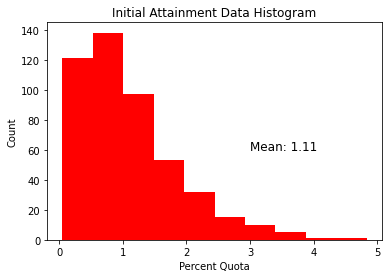

In [ ]:
import matplotlib.pyplot as plt
plt.hist(sales_df['Attainment'],color='red')
text = 'Mean: ' + str(round(sales_df['Attainment'].mean(), 2)) + '\n'
plt.text(3, 50, text, fontsize=12)
plt.title('Initial Attainment Data Histogram')
plt.xlabel('Percent Quota')
plt.ylabel('Count')
plt.show()

***From the summary table and the provided histogram we can confidently say that the Attainment variable is not normally distributed at this point***

## Step 3 - Additional EDA of output variable
You'll always want to know more about your output variable than just a numeric summary. As such, include a histogram of your output variable.

\\
The statistical analyses we will use require that our output variable be normally distributed. Determine whether that requirement is met. If not, transform the output variable to normalize it. If you choose to take this step, save the transformed output in your data with the column name `AttainmentNormal`.

\\
If you transform the output variable, every reference of `output` for the remainder of the project refers to the transformed variable.

\\
## Step 4 - Select variables to include in report
Now that you've calculated summary statistics, you can analyze how each input variable relates to your output.

\\
Create a function that takes a column name as an input and analyzes the relationship between that input variable and your output variable. Your function should print the following two plots side by side:
*   A histogram of the input variable
*   A scatterplot of the input variable on the x-axis and the output variable on the y-axis

Your plots should align with the instructions in Step 0.

\\
Once your function works properly, use a while loop that allows the user (primarily you) to keep visualizing variables until the user explicitly decides to exit the loop.

\\
Use the function/loop combination to identify which three variables you think are worth including in your report. The dataset was designed so that some inputs have no relationship with the output, some have a week relationship, and some have a strong relationship. A large portion of the points you earn on this project will come from selecting variables that have a strong relationship with the output to use in the report.

## Step 5 - Defend your choices
Now that you've identified which variables are worth paying attention to, you need to convince everyone else. Most people can be convinced in two steps--explaining your methodology and visualizing the data. Take both of those steps by including:
1.   A 2-3 sentence explanation of correlation and why it's useful in this context
2.   A scatterplot of each of your three selected variables with your output variable (again, remember Step 0)

## Submission
Your final submission should include the following outputs, named with the formats specified below:
1.   Your final, cleaned dataset (`LastnameFirstname_Data.csv`)
2.   A separate dataset including the numeric summary of every variable in your data (`LastnameFirstname_EDA.csv`)
4.   Your `.ipynb` file (`LastnameFirstname_Final.ipynb`), which should include visualizations and your correlation explanation
